In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
F = 6
L = 10
N = (F+L)*100
data = dict(N=N)

### Exercise 1

In [3]:
model_1 = CmdStanModel(stan_file = 'code_1.stan')
result_1 = model_1.sample(data = data, fixed_param = True)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [4]:
model_2 = CmdStanModel(stan_file = 'code_2.stan')
result_2 = model_2.sample(data = data, fixed_param=True)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:07 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [5]:
y1 = result_1.stan_variable('y')
x2 = result_2.stan_variable('X')

data_y1 = dict(N = N, y = y1[0])

### Exercise 2

In [6]:
model_3 = CmdStanModel(stan_file = 'code_3.stan')
result_3 = model_3.sample(data = data_y1, fixed_param=True)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [7]:
model_4 = CmdStanModel(stan_file = 'code_4.stan')
result_4 = model_3.sample(data = data_y1, fixed_param=True)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance



         rank          loo  p_loo        d_loo    weight           se  \
model_3     0 -3885.654540    0.0     0.000000  0.143744    62.867805   
model_4     1 -8362.104889    0.0  4476.450349  0.856256  1905.133463   

                 dse  warning loo_scale  
model_3     0.000000     True       log  
model_4  1842.609866     True       log  


<AxesSubplot:xlabel='Log'>

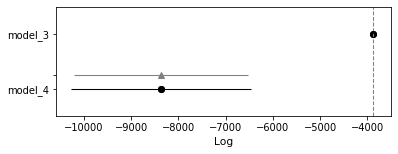

In [8]:
data_3_4 = dict(model_3 = result_3, model_4 = result_4)
comp_loo = az.compare(data_3_4, ic = "loo")
print('\n')
print(comp_loo)
az.plot_compare(comp_loo)

C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])




         rank         waic        p_waic       d_waic    weight           se  \
model_3     0 -3885.654540  2.184224e-24     0.000000  0.143744    62.867805   
model_4     1 -8362.104889  9.247614e-22  4476.450349  0.856256  1905.133463   

                 dse  warning waic_scale  
model_3     0.000000    False        log  
model_4  1842.609866    False        log  


<AxesSubplot:xlabel='Log'>

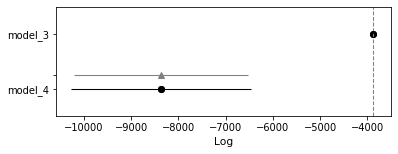

In [9]:
comp_waic = az.compare(data_3_4, ic = 'waic')
print('\n')
print(comp_waic)
az.plot_compare(comp_waic)

### Exercise 3

In [10]:
model_5 = CmdStanModel(stan_file = 'code_5.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jakub Burczyk\Documents\VSCodeProjects\DA_Burczyk\Lab_7_Marcin\code_5.stan to exe file C:\Users\Jakub Burczyk\Documents\VSCodeProjects\DA_Burczyk\Lab_7_Marcin\code_5.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jakub Burczyk\Documents\VSCodeProjects\DA_Burczyk\Lab_7_Marcin\code_5.exe


In [11]:
data_5_1 = dict(N = N, K = 1, y = y1[0], X = x2[0,:,0:1])
result_5_1 = model_5.sample(data = data_5_1, fixed_param = True)

data_5_2 = dict(N = N, K = 2, y = y1[0], X = x2[0,:,0:2])
result_5_2 = model_5.sample(data = data_5_2, fixed_param = True)

data_5_3 = dict(N = N, K = 3, y = y1[0], X = x2[0,:,0:3])
result_5_3 = model_5.sample(data = data_5_3, fixed_param = True)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:05 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:05 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:05 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance



           rank            loo  p_loo          d_loo    weight            se  \
model_5_3     0   -3516.201680    0.0       0.000000  0.042406    162.282016   
model_5_1     1   -3718.980530    0.0     202.778850  0.921344    399.473882   
model_5_2     2 -132881.003027    0.0  129364.801347  0.036250  30937.064858   

                    dse  warning loo_scale  
model_5_3      0.000000     True       log  
model_5_1    238.177986     True       log  
model_5_2  30775.893913     True       log  


<AxesSubplot:xlabel='Log'>

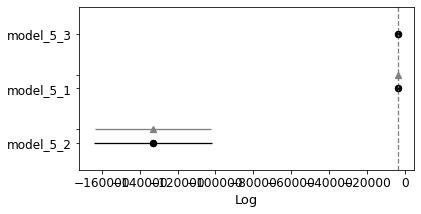

In [12]:
data_5 = dict(model_5_1 = result_5_1, model_5_2 = result_5_2, model_5_3 = result_5_3)
comp_loo_5 = az.compare(data_5, ic = "loo")
print('\n')
print(comp_loo_5)
az.plot_compare(comp_loo_5)

C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])




           rank           waic        p_waic         d_waic    weight  \
model_5_3     0   -3516.201680  5.062666e-24       0.000000  0.042406   
model_5_1     1   -3718.980530  2.507620e-23     202.778850  0.921344   
model_5_2     2 -132881.003027  1.100226e-19  129364.801347  0.036250   

                     se           dse  warning waic_scale  
model_5_3    162.282016      0.000000    False        log  
model_5_1    399.473882    238.177986    False        log  
model_5_2  30937.064858  30775.893913    False        log  


<AxesSubplot:xlabel='Log'>

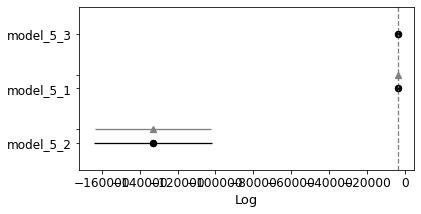

In [13]:
comp_waic_5 = az.compare(data_5, ic = "waic")
print('\n')
print(comp_waic_5)
az.plot_compare(comp_waic_5)